In [1]:
from math import sqrt
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from env import user, host, password

### 1. Are the average grades in web development vs data science classes different?

$H_0$: The average grades in both cohorts are not different

$H_a$: The average grades in both cohorts are different

- TP: DS grades on average are lower because the course is harder
- FP(T1): Comparing DS month 4 to WD month 1, undercoverage sampling error
- TN: The average grades across both cohorts are the same
- FN(T2): The average grades are the same, if data was volunteered then only people with good grades answered

### 2. Is there a relationship between how early a student shows up to class and their grade?


$H_0$: There is no relationship between how early a student shows up to class and their grade

$H_a$: The grade of a student lowers based on how early they show up

- TP: Students with lower grades show up earlier
- FP: Students with lower grades show up earlier, but there is one student with a huge outlier grade affecting that change
- TN: Grades do not change based on how early a student shows up
- FN: Grades do not change, but random sampling happened to miss several students who show up early with poor grades

### 3. Are web dev or data science students more likely to be coffee drinkers?

$H_0$: There is no relationship between cohort and likelihood of drinking coffee

$H_a$: DS students are more likely to drink coffee

- TP: DS students are more likely to drink coffee
- FP(T1): DS students are more likely to drink coffee, but the answers are skewed because the question was asked the day of a test in DS 
- TN: Cohort does not affect likelihood of drinking coffee
- FN(T2): Cohort does not affect likelihood of drinking coffee, but 3/4 of the surveys were not answered

### 4. Has the network latency gone up since we switched internet service providers?

$H_0$: Network latency has not changed since switching service providers

$H_a$: Network latency has gone up since switching service providers

- TP: Network latency has gone up with the new provider
- FP(T1): Network latency has gone up, but it is because more people are using the service
- TN: Network latency has not changed with the new provider
- FN(T2): Network latency has not changed, but we also switched to fiber

### 5. Is the website redesign any good?

$H_0$: The period of time people stay on our website has not changed

$H_a$: The period of time people stay on our website has gone up

- TP: People stay on our website longer after the redesign
- FP(T1): People stay on our website longer after the redesign, but it has only been one week and we do not have enough data
- TN: The period of time people stay on our website has not changed
- FN(T2): The period of time people stay on our website has not changed, but it's only been one week and we do not have enough data

### 6. Is our TV ad driving more sales?

$H_0$: Our sales have not changed after our TV ad

$H_a$: Sales after our TV ad have gone up

- TP: Our sales have gone up after our TV ad
- FP(T1): Our sales have gone up after our TV ad, but we sell tiolet paper during coronavirus
- TN: Our sales have not changed after our TV ad
- FN(T2): Our sales have not changed after our TV ad, but the ad was only aired during the day when many people might be working

### T-test
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 

Use a .05 level of significance.

In [2]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

In [3]:
p = stats.t(degf).sf(abs(t)) * 2
p

0.01020985244923939

In [4]:
print(f'Since p {p:.2f} is less than targeted siginificance of ' +
      '.05, we can reject our null hypothesis that the average ' +
      'time it takes to sell homes is the same for both offices')

Since p 0.01 is less than targeted siginificance of .05, we can reject our null hypothesis that the average time it takes to sell homes is the same for both offices


In [5]:
mpg = data('mpg')
mpg['ave_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg['trans'] = mpg.trans.str.split('(').apply(lambda x: x[0])
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,ave_mpg
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,22.0


t_stat = 0.2196 
p = 0.8264
Since our p value of 0.8264 is greater than .05, 
we must fail to reject our null hypothesis that there is
no difference in fuel_efficiency between cars made in
1999 vs cars made in 2008


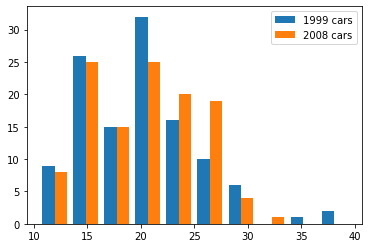

In [6]:
import matplotlib.pyplot as plt
x1 = mpg[mpg.year == 1999].ave_mpg
x2 = mpg[mpg.year == 2008].ave_mpg
t_stat, p = stats.ttest_ind(x1, x2)
print(f't_stat = {t_stat:.4f} \np = {p:.4f}')
print(f'''Since our p value of {p:.4f} is greater than .05, 
we must fail to reject our null hypothesis that there is
no difference in fuel_efficiency between cars made in
1999 vs cars made in 2008''')

plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [7]:
x = mpg[mpg['class'] == 'compact'].ave_mpg
mu = mpg.ave_mpg.mean()
t_stat, p = stats.ttest_1samp(x, mu)

print(f't_stat = {t_stat:.4f} \np = {p:.11f}')
print(f'Since our p value of {p:.11f} is less than .05, ' +
     'we must reject our null hypothesis that there is ' +
     'no difference in fuel_efficiency between compact cars ' +
     'and average cars')

t_stat = 7.8969 
p = 0.00000000042
Since our p value of 0.00000000042 is less than .05, we must reject our null hypothesis that there is no difference in fuel_efficiency between compact cars and average cars


In [8]:
x1 = mpg[mpg.trans.isin(['manual'])].ave_mpg
x2 = mpg[mpg.trans.isin(['auto'])].ave_mpg
t_stat, p = stats.ttest_ind(x1, x2)
print(f't_stat = {t_stat:.4f} \np = {p:.7f}')
print(f'Since our p value of {p:.7f} is less than .05, ' +
     'we must reject our null hypothesis that there is ' +
     'no difference in fuel_efficiency between manual cars ' +
     'and automatic cars')

t_stat = 4.5934 
p = 0.0000072
Since our p value of 0.0000072 is less than .05, we must reject our null hypothesis that there is no difference in fuel_efficiency between manual cars and automatic cars


In [9]:
def get_db_url(user, host, password, db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

url = get_db_url(user, host, password, 'telco_churn')
customers = pd.read_sql('SELECT * FROM customers', url)

customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


r = 0.2479, p = 4.0940449915016345e-99
Since 4.0940449915016345e-99 is less than alpha .05, we must reject the 
null hypothesis that there is no linear relationship between 
tenure and monthly charges


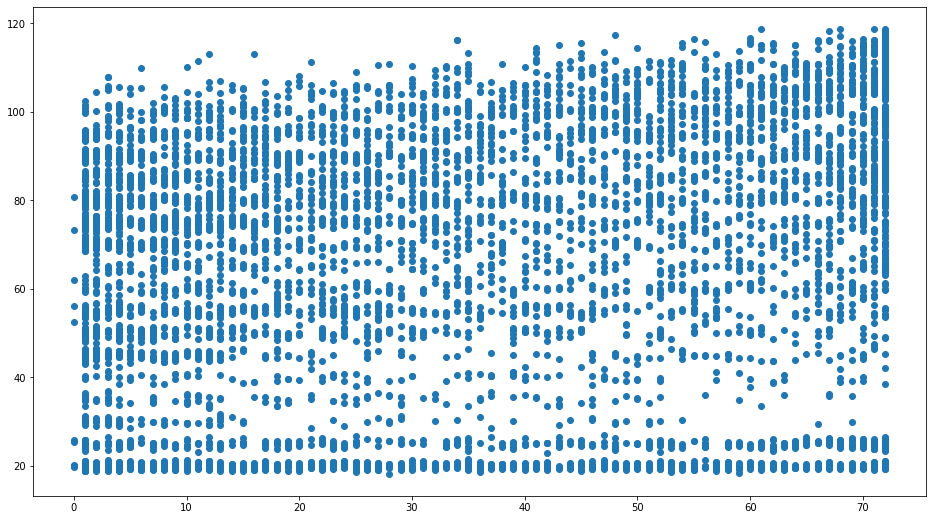

In [10]:
x = customers.tenure
y = customers.monthly_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject the 
null hypothesis that there is no linear relationship between 
tenure and monthly charges''')

In [11]:
customers.total_charges.replace(' ', 0, inplace=True)
customers.total_charges = customers.total_charges.astype(float)

r = 0.8262, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


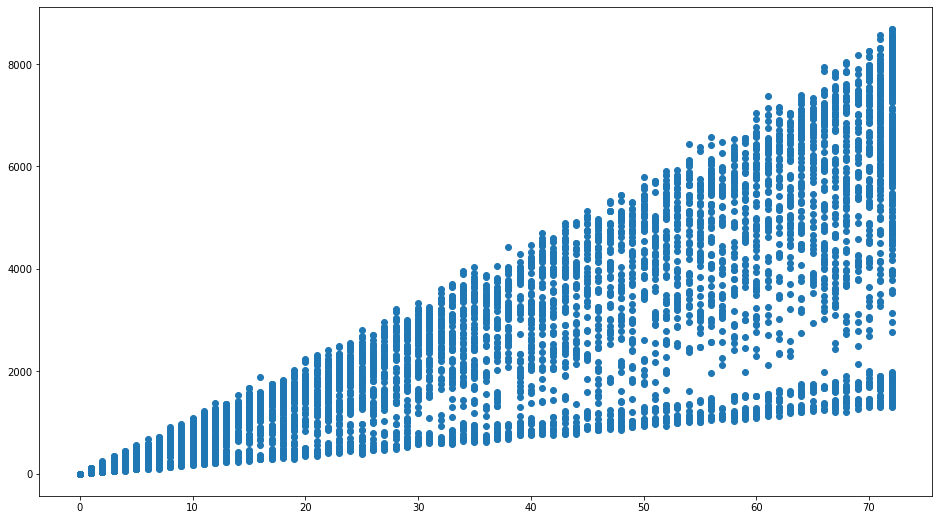

In [12]:
x = customers.tenure
y = customers.total_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

In [13]:
x1 = customers[customers.phone_service == 'Yes'].monthly_charges
x2 = customers[customers.phone_service == 'No'].monthly_charges
t, p = stats.ttest_ind(x1, x2)
print(f't = {t:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

t = 21.4254, p = 1.0421589008999326e-98
Since 1.0421589008999326e-98 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


In [14]:
x1 = customers[customers.phone_service == 'Yes'].total_charges
x2 = customers[customers.phone_service == 'No'].total_charges
t, p = stats.ttest_ind(x1, x2)
print(f't = {t:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

t = 9.5613, p = 1.570717142460418e-21
Since 1.570717142460418e-21 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


In [15]:
customers['with_int'] = customers.internet_service_type_id != 3
customers['with_phone'] = customers.phone_service == 'Yes'
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,with_int,with_phone
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,No,2,Yes,2,65.60,593.30,No,True,True
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,Yes,1,No,2,59.90,542.40,No,True,True
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,1,Yes,1,73.90,280.85,Yes,True,True
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,Yes,1,Yes,1,98.00,1237.85,Yes,True,True
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,No,1,Yes,2,83.90,267.40,Yes,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,No,2,No,2,55.15,742.90,No,True,True
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,Yes,1,Yes,1,85.10,1873.70,Yes,True,True
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,1,Yes,2,50.30,92.75,No,True,True
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,No,Yes,3,No,2,67.85,4627.65,No,True,True


r = 0.4431, p = 1.0146095231152447e-231
Since 1.0146095231152447e-231 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


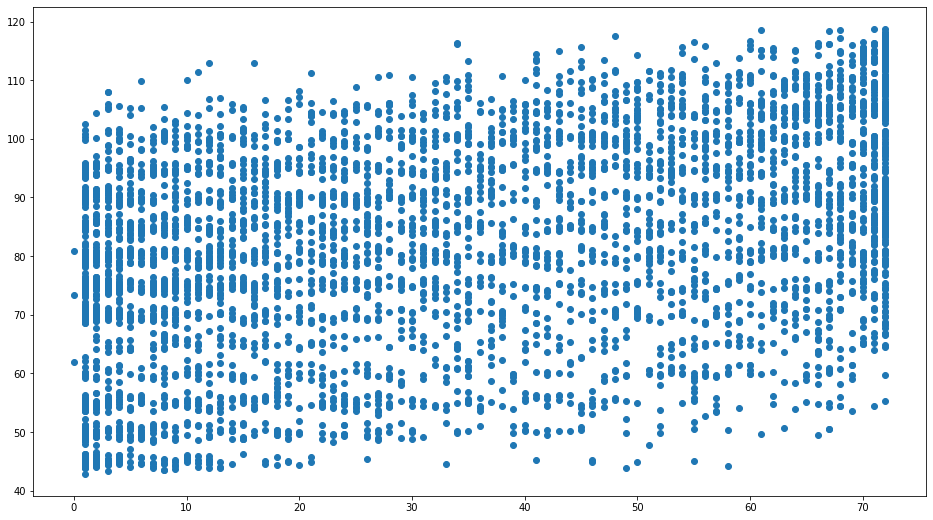

In [16]:
x = customers[(customers.with_int == True) & 
             (customers.with_phone == True)].tenure
y = customers[(customers.with_int == True) & 
             (customers.with_phone == True)].monthly_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

r = 0.5858, p = 4.603370347342836e-64
Since 4.603370347342836e-64 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


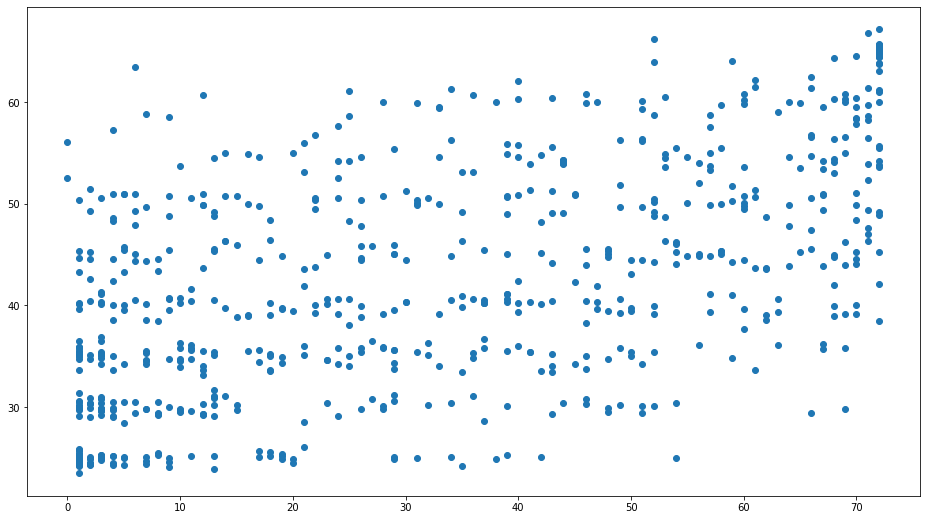

In [17]:
x = customers[(customers.with_int == True) & 
             (customers.with_phone == False)].tenure
y = customers[(customers.with_int == True) & 
             (customers.with_phone == False)].monthly_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

r = 0.3423, p = 3.356186955197392e-43
Since 3.356186955197392e-43 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


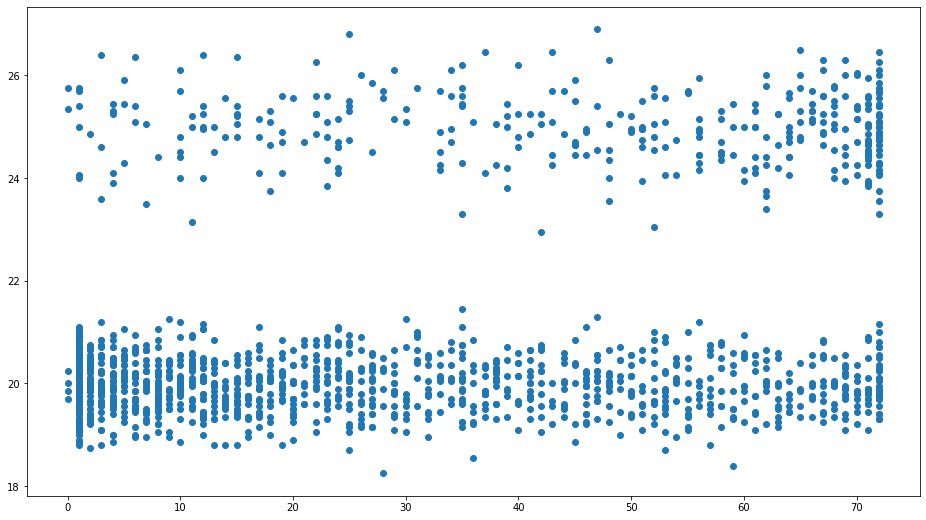

In [18]:
x = customers[(customers.with_int == False) & 
             (customers.with_phone == True)].tenure
y = customers[(customers.with_int == False) & 
             (customers.with_phone == True)].monthly_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

r = 0.9580, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


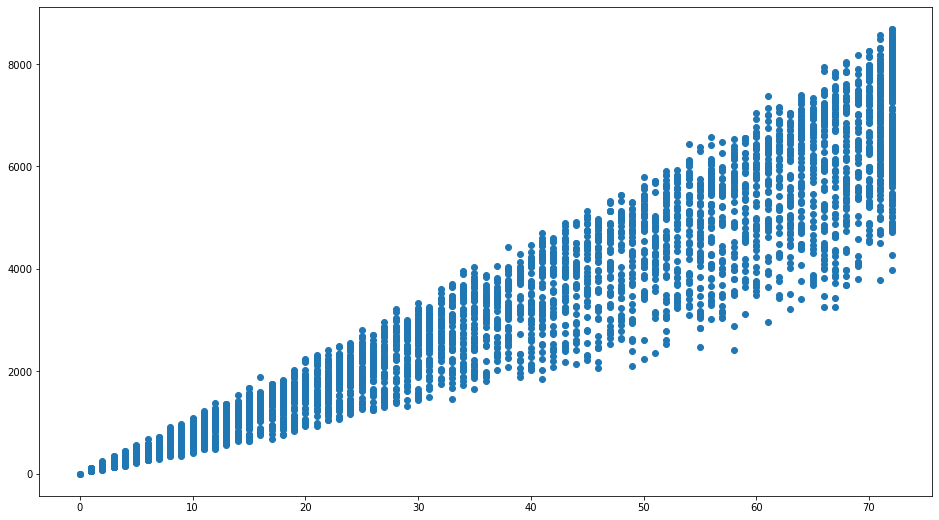

In [19]:
x = customers[(customers.with_int == True) & 
             (customers.with_phone == True)].tenure
y = customers[(customers.with_int == True) & 
             (customers.with_phone == True)].total_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

r = 0.9536, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


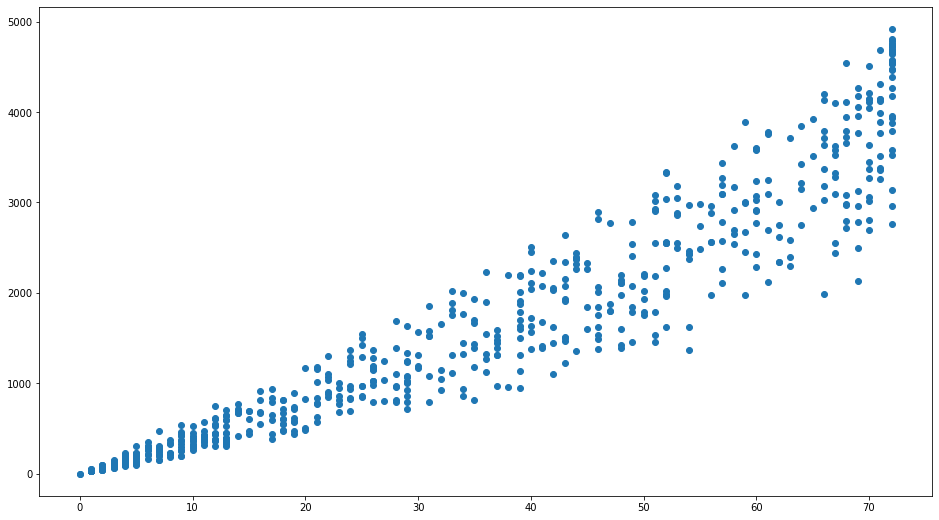

In [20]:
x = customers[(customers.with_int == True) & 
             (customers.with_phone == False)].tenure
y = customers[(customers.with_int == True) & 
             (customers.with_phone == False)].total_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

r = 0.9816, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges


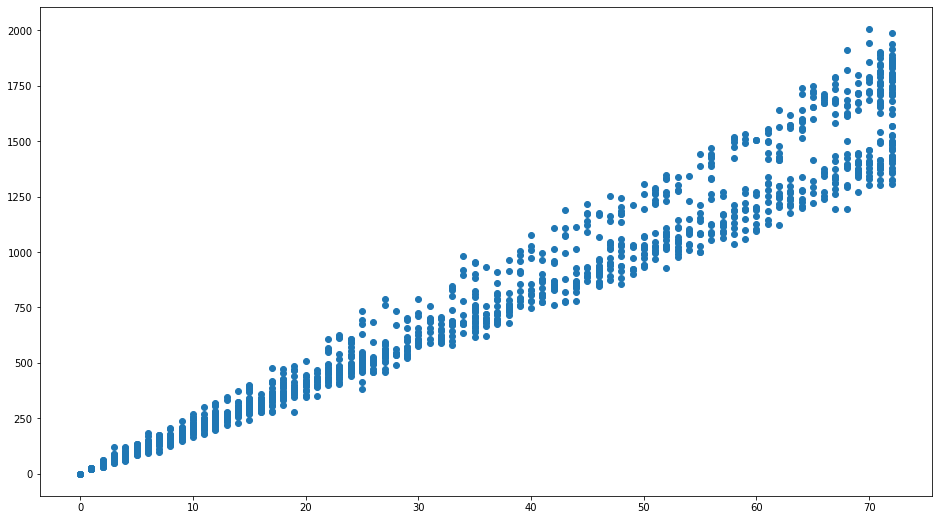

In [21]:
x = customers[(customers.with_int == False) & 
             (customers.with_phone == True)].tenure
y = customers[(customers.with_int == False) & 
             (customers.with_phone == True)].total_charges

plt.figure(figsize=(16,9))
plt.scatter(x, y)
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and monthly charges''')

In [22]:
url = get_db_url(user, host, password, 'employees')

query = """
    SELECT *
    FROM salaries s
    JOIN employees e
        ON e.emp_no = s.emp_no
    JOIN titles t
        ON t.emp_no = e.emp_no
    WHERE s.to_date LIKE '9999%%'
    """

employees = pd.read_sql(query, url)

employees

/usr/local/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Incorrect date value: '9999%' for column 'to_date' at row 1")
  result = self._query(query)


,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,72527,2001-08-02,9999-01-01,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,43311,2001-12-01,9999-01-01,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,74057,2001-11-27,9999-01-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Engineer,1986-12-01,1995-12-01
4,10004,74057,2001-11-27,9999-01-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499997,83441,2001-08-26,9999-01-01,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Engineer,1987-08-30,1992-08-29
371239,499997,83441,2001-08-26,9999-01-01,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Senior Engineer,1992-08-29,9999-01-01
371240,499998,55003,2001-12-25,9999-01-01,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Senior Staff,1998-12-27,9999-01-01
371241,499998,55003,2001-12-25,9999-01-01,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Staff,1993-12-27,1998-12-27


In [23]:
cols = list(employees.columns)
cols

employees.columns = [
 'emp_no',
 'salary',
 'from_date1',
 'to_date1',
 'emp_no2',
 'birth_date',
 'first_name',
 'last_name',
 'gender',
 'hire_date',
 'emp_no3',
 'title',
 'from_date2',
 'to_date2']
employees.drop(['emp_no2','emp_no3'],1, inplace=True)


In [24]:
employees['days_worked'] = (datetime.date.today() - 
                            employees.hire_date)
employees.days_worked = (
employees.days_worked.astype(str).str.split(' ').apply(lambda x: x[0]))
employees.days_worked


0         12326
1         12543
2         12263
3         12168
4         12168
          ...  
371238    12392
371239    12392
371240     9660
371241     9660
371242     8151
Name: days_worked, Length: 371243, dtype: object

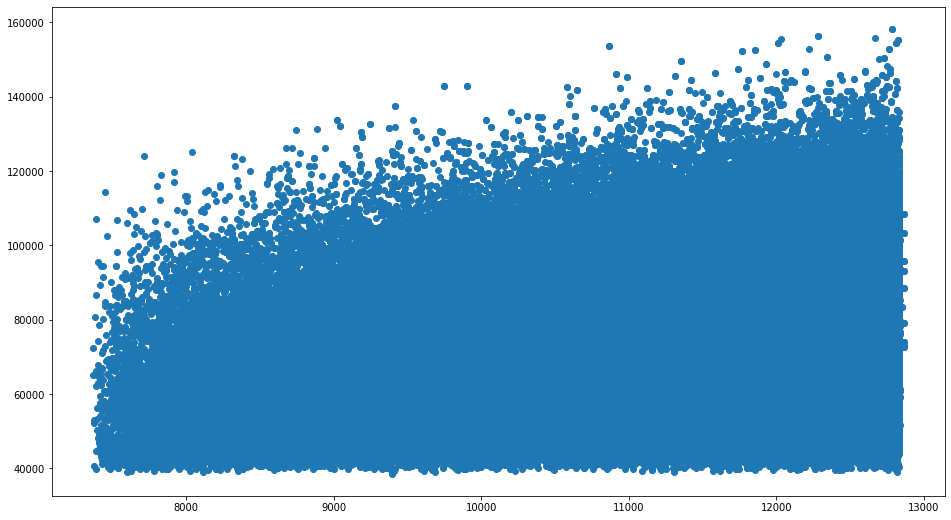

r = 0.3073, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and salary


In [25]:
x = employees.days_worked.astype(int)
y = employees.salary

plt.figure(figsize=(16,9))
plt.scatter(x, y)
plt.show()
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and salary''')

In [26]:
# employees['titles'] = employees.emp_no.value_counts().sort_index()
title_frame = pd.DataFrame(employees.emp_no.value_counts().sort_index())
title_frame.columns = ['titles']
title_frame

,titles
10001,1
10002,1
10003,1
10004,2
10005,2
...,...
499995,1
499996,2
499997,2
499998,2


In [27]:
employees = employees.join(title_frame.titles,on='emp_no')

In [28]:
employees

,emp_no,salary,from_date1,to_date1,birth_date,first_name,last_name,gender,hire_date,title,from_date2,to_date2,days_worked,titles
0,10001,88958,2002-06-22,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,12326,1
1,10002,72527,2001-08-02,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,12543,1
2,10003,43311,2001-12-01,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,12263,1
3,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,12168,2
4,10004,74057,2001-11-27,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,12168,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499997,83441,2001-08-26,9999-01-01,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,12392,2
371239,499997,83441,2001-08-26,9999-01-01,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,12392,2
371240,499998,55003,2001-12-25,9999-01-01,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,9660,2
371241,499998,55003,2001-12-25,9999-01-01,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,9660,2


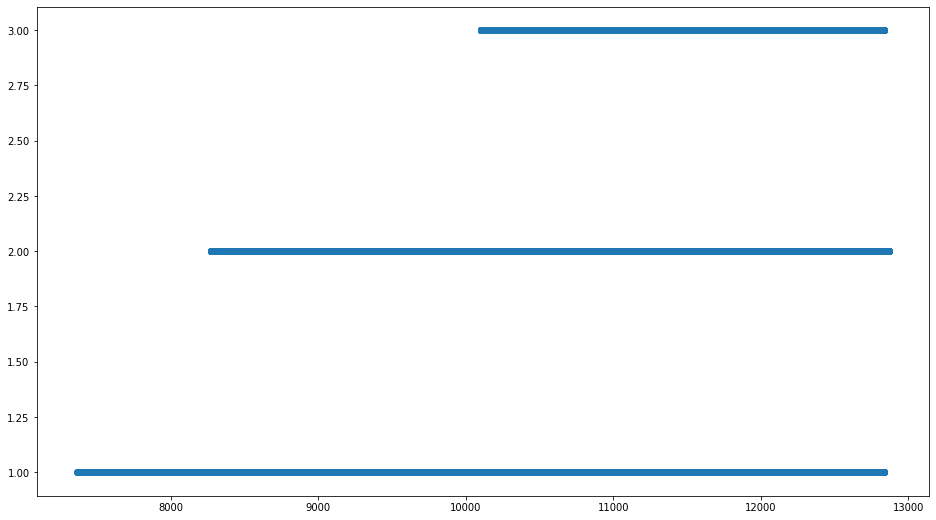

r = 0.2874, p = 0.0
Since 0.0 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and number of titles


In [29]:
x = employees.days_worked.astype(int)
y = employees.titles

plt.figure(figsize=(16,9))
plt.scatter(x, y)
plt.show()
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between tenure and number of titles''')

In [32]:
df = data()
df[df.title.str.contains("sleep")]

,dataset_id,title
383,msleep,An updated and expanded version of the mammals sleep dataset.
705,cushny,A data set from Cushny and Peebles (1905) on the effect of three drugs on hours of sle...
756,sleepstudy,Reaction times in a sleep deprivation study


In [33]:
sleep = data('sleepstudy')
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


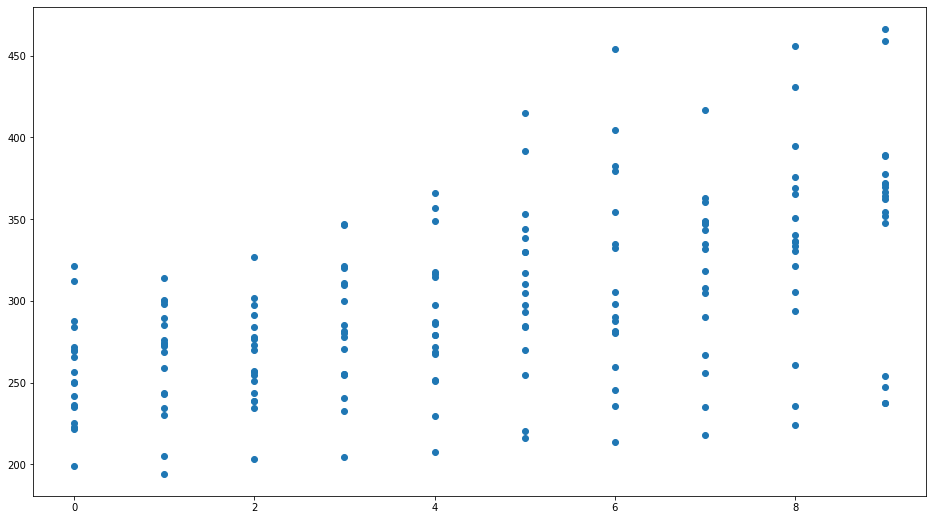

r = 0.5352, p = 9.894096322214812e-15
Since 9.894096322214812e-15 is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between days and reaction time


In [36]:
x = sleep.Days
y = sleep.Reaction

plt.figure(figsize=(16,9))
plt.scatter(x, y)
plt.show()
r, p = stats.pearsonr(x, y)
print(f'r = {r:.4f}, p = {p}')
print(f'''Since {p} is less than alpha .05, we must reject 
the null hypothesis that there is no linear relationship 
between days and reaction time''')